In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df.iloc[:,1:]
y= df['0']
x=x/255

In [5]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
img = np.array(x.iloc[77399]).reshape(28,28)


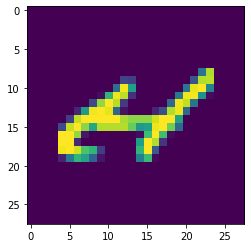

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)


In [9]:
y.iloc[77300]

7

In [ ]:
#To Save Ram Space
df,x,y=0,0,0

# Using ANN

In [10]:
from tensorflow.keras.utils import to_categorical 

In [11]:
y_train = to_categorical(y_train,num_classes=26)
y_test = to_categorical(y_test,num_classes=26)

In [12]:
model_ann = Sequential()
model_ann.add(Dense(104,input_shape=(784,)))
model_ann.add(Dense(52,activation='relu'))
model_ann.add(Dense(26,activation='softmax'))

In [13]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 104)               81640     
_________________________________________________________________
dense_1 (Dense)              (None, 52)                5460      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1378      
Total params: 88,478
Trainable params: 88,478
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_ann.compile(loss='categorical_crossentropy',    metrics=['accuracy'])

In [15]:
model_ann.fit(X_train,y_train,batch_size=64,
    epochs=5)

Epoch 1/5
4074/4074 [==============================] - 12s 3ms/step - loss: 0.6252 - accuracy: 0.8308
Epoch 2/5
4074/4074 [==============================] - 11s 3ms/step - loss: 0.2408 - accuracy: 0.9346
Epoch 3/5
4074/4074 [==============================] - 11s 3ms/step - loss: 0.2021 - accuracy: 0.9460
Epoch 4/5
4074/4074 [==============================] - 11s 3ms/step - loss: 0.1866 - accuracy: 0.9504
Epoch 5/5
4074/4074 [==============================] - 11s 3ms/step - loss: 0.1740 - accuracy: 0.9538


# Test Data

In [19]:
model_ann.evaluate(X_test,y_test)

3492/3492 [==============================] - 7s 2ms/step - loss: 0.1914 - accuracy: 0.9530


[0.19143939018249512, 0.9529690742492676]

In [20]:
model_ann.save('model_ann.h5')